In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

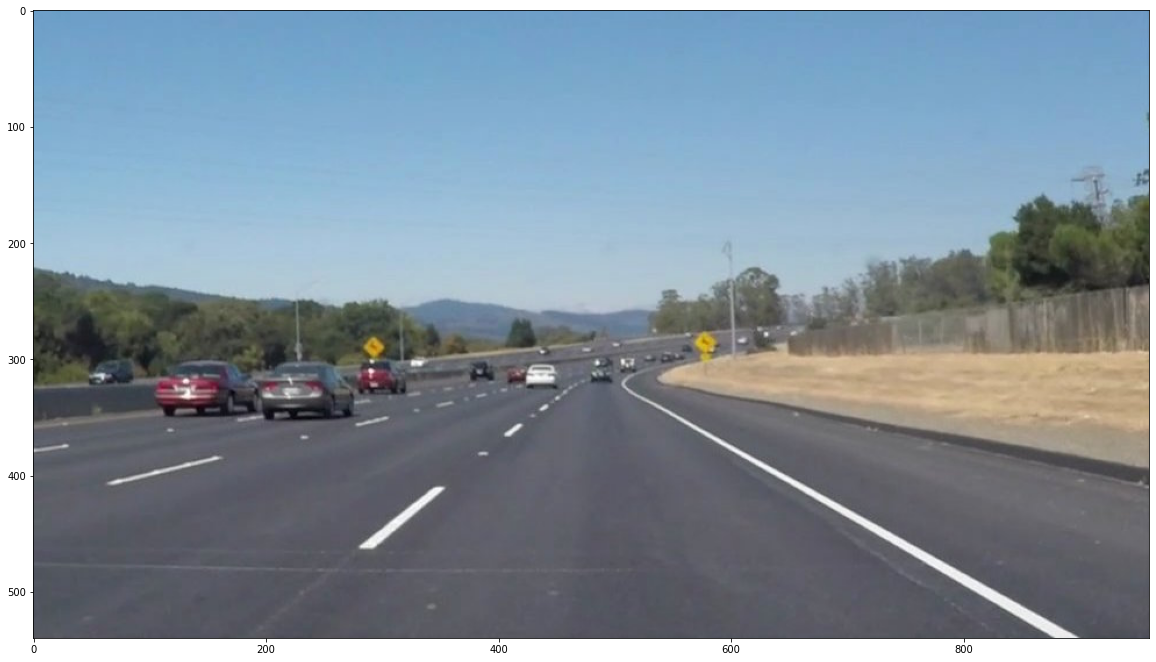

In [2]:
img = cv2.imread(r'resources\test_images\solidWhiteCurve.jpg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,16))
plt.imshow(rgb_img)

In [10]:
print(rgb_img.shape)
height = rgb_img.shape[0]
width = rgb_img.shape[1]

region_of_interest_vertices = [
    (0, height),
    (width/2, height/1.7),
    (width, height)
]

(540, 960, 3)


In [11]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image






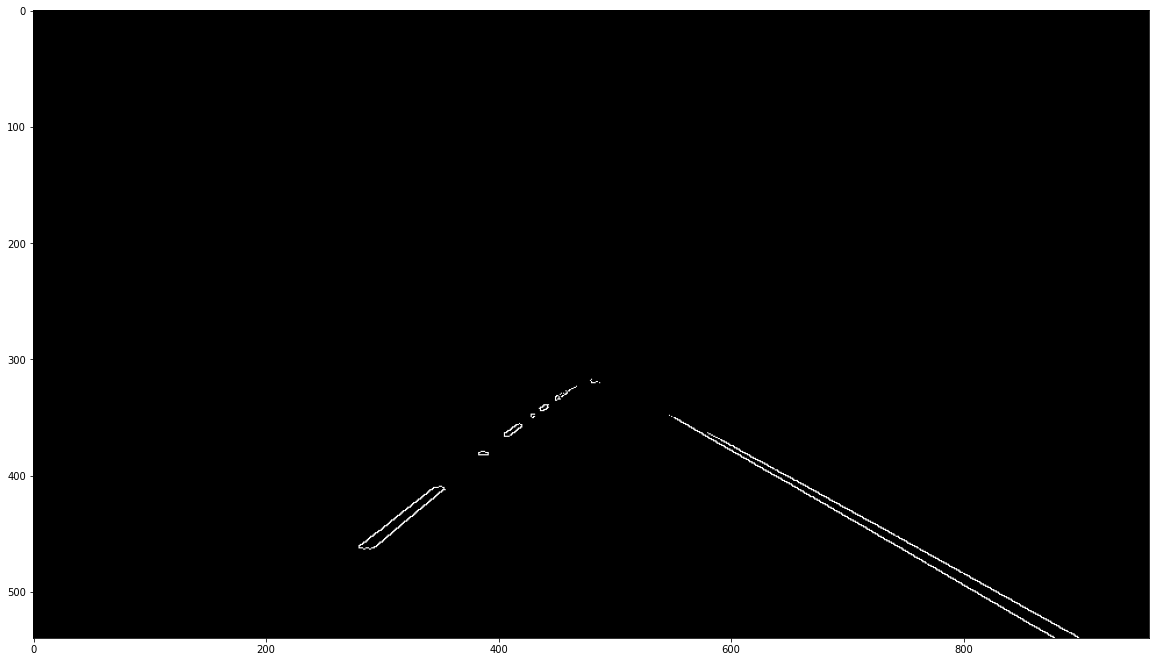

In [12]:

gray_image = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)
canny_image = cv2.Canny(gray_image, 100,200)
cropped_image = region_of_interest(canny_image,
                np.array([region_of_interest_vertices], np.int32),)

plt.figure(figsize=(20,16))
plt.imshow(cropped_image, cmap='gray')

In [6]:
lines = cv2.HoughLinesP(cropped_image, rho=6, theta=np.pi/60, threshold=160, lines=np.array([]), minLineLength=40, maxLineGap=25)
lines

array([[[549, 349, 878, 539]],

       [[682, 418, 772, 469]],

       [[629, 389, 705, 432]],

       [[386, 382, 467, 323]],

       [[805, 486, 898, 539]],

       [[383, 381, 454, 329]],

       [[554, 351, 793, 489]],

       [[385, 382, 465, 324]]], dtype=int32)

In [7]:
def drow_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1,y1), (x2,y2), (0, 255, 0), thickness=10)

    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

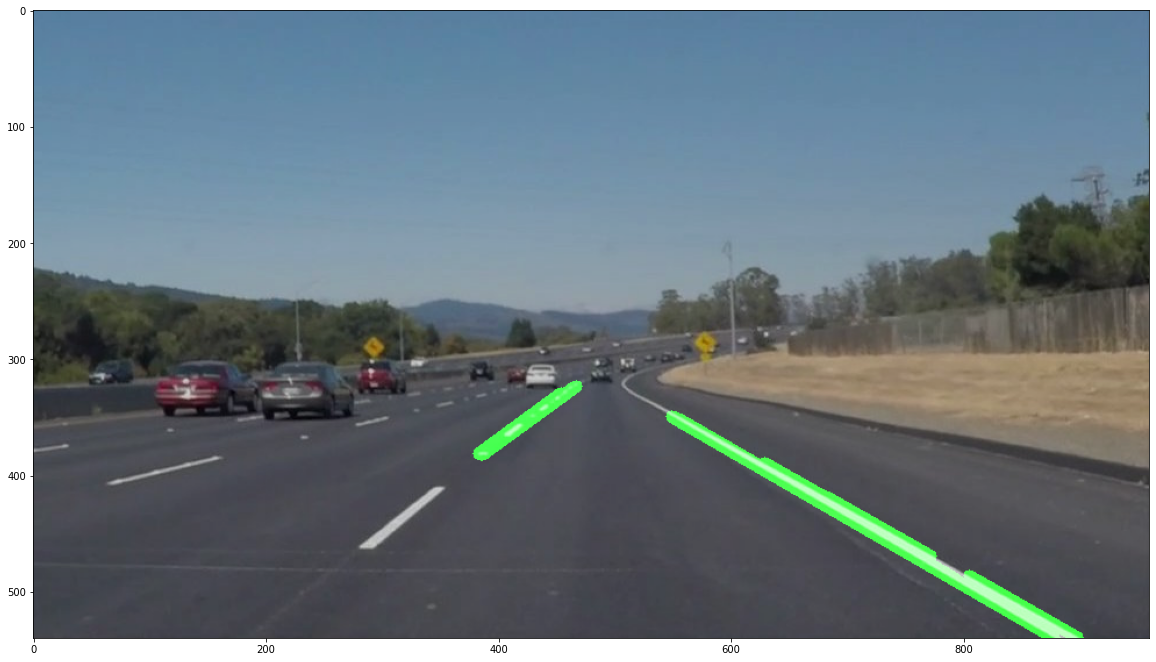

In [8]:
image_lines = drow_the_lines(rgb_img, lines)
plt.figure(figsize=(20,16))
plt.imshow(image_lines)

In [9]:
def process(image):
    
    height = image.shape[0]
    width = image.shape[1]

    region_of_interest_vertices = [
        (0, height),
        (width/2, height/1.7),
        (width, height)
    ]
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    canny_image = cv2.Canny(gray_image, 100,200)
    cropped_image = region_of_interest(canny_image,
                    np.array([region_of_interest_vertices], np.int32),)

    lines = cv2.HoughLinesP(cropped_image, rho=6, theta=np.pi/60, threshold=160, lines=np.array([]), minLineLength=40, maxLineGap=25)
    image_lines = drow_the_lines(image, lines)
    return image_lines
    

    

In [10]:
cap = cv2.VideoCapture(r'resources\test_videos\solidWhiteRight.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()
    frame = process(frame)
    cv2.imshow('trail',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



KeyboardInterrupt

